In [1]:
# Author: Naziah Siddique 29-06-21 

# Create an annotation file from an existing one 

from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import skimage.io as io


from pathlib import Path
import json

from fastai.vision.all import *

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

data_dir = Path('../../data/')

In [82]:
coco_img_train = data_dir / Path('images/train2017/')
coco_ann_train = data_dir / Path('annotations/instances_train2017.json')


coco_ann_val = data_dir / Path('annotations/instances_val2017.json')
coco_img_val = data_dir / Path('images/val2017/')

coco_val=COCO(coco_ann_val)
coco_train=COCO(coco_ann_train)

loading annotations into memory...
Done (t=0.37s)
creating index...
index created!
loading annotations into memory...
Done (t=12.96s)
creating index...
index created!


In [80]:
# get all images containing given categories, in this case all the people 
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
imgs = coco.loadImgs(imgIds)

# Get all annotations for the images and the category we need (i.e. all person(s))
annIds = coco.getAnnIds(imgIds=[i['id'] for i in imgs], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

# Create our dictionary and dump into a json file 
new_annotations = {
    "images":imgs, 
    "annotations":anns, 
    "categories":[{
      "supercategory": "person",
      "id": 1,
      "name": "person"
    },]}

with open('instances_human_val2017.json', 'w') as f:
    json.dump(new_annotations, f)

In [83]:
# get all images containing given categories, in this case all the people 
catIds = coco_train.getCatIds(catNms=['person']);
imgIds = coco_train.getImgIds(catIds=catIds );
imgs = coco_train.loadImgs(imgIds)

# Get all annotations for the images and the category we need (i.e. all person(s))
annIds = coco_train.getAnnIds(imgIds=[i['id'] for i in imgs], catIds=catIds, iscrowd=None)
anns = coco_train.loadAnns(annIds)

# Create our dictionary and dump into a json file 
new_annotations = {
    "images":imgs, 
    "annotations":anns, 
    "categories":[{
      "supercategory": "person",
      "id": 1,
      "name": "person"
    },]}

with open('instances_human_train2017.json', 'w') as f:
    json.dump(new_annotations, f)

In [102]:
# Fast.ai method to parse COCO annotations 
train_imgs, lbl_bbox = get_annotations('instances_human_train2017.json')
val_imgs, lbl_bbox = get_annotations('instances_human_val2017.json')

In [103]:
len(train_imgs), len(val_imgs)

(64115, 2693)

In [123]:
# importing shutil module
import shutil
 
# Source path
source = "/home/User/Documents/file.txt"
 
# Destination path
destination = "/home/User/Documents/file.txt"

slice_train_dir = Path(coco_img_train.parent / Path(str(coco_img_train.name) + 'human'))
slice_val_dir = Path(coco_img_val.parent / Path(str(coco_img_val.name) + 'human'))

# os.makedirs(slice_val_dir)
# os.makedirs(slice_train_dir)

# for img in val_imgs: 
#     source = coco_img_val / Path(img)
#     dest = slice_val_dir / Path(img)
#     shutil.copy(source, dest)
    
for img in train_imgs: 
    source = coco_img_train / Path(img)
    dest = slice_train_dir / Path(img)
    shutil.copy(source, dest)

In [105]:
coco_img_train

Path('../../data/images/train2017')

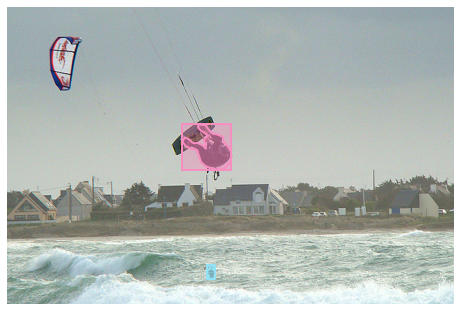

In [173]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = imgIds[0])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

I = io.imread(img['coco_url'])

plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)

In [174]:
bbox_area = anns[0]['bbox'][2] * anns[0]['bbox'][3]
area = img['width'] * img['height']

In [175]:
bbox_area / area * 100

1.6684040492957746

In [147]:
len(val_imgs)

2693

In [193]:
train_imgs[0]

'000000262145.jpg'

In [195]:

help(coco.loadImgs())

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign

In [169]:
coco_img_train_split = data_dir / Path('images/train2017human/')
coco_ann_train_split = data_dir / Path('annotations/instances_human_train2017.json')

coco_ann_val_split = data_dir / Path('annotations/instances_human_val2017.json')
coco_img_val_split = data_dir / Path('images/val2017human/')

coco_val_split=COCO(coco_ann_val_split)
coco_train_split=COCO(coco_ann_train_split)

loading annotations into memory...
Done (t=0.53s)
creating index...
index created!
loading annotations into memory...
Done (t=16.17s)
creating index...
index created!


In [187]:
# catIds = coco.getCatIds(catNms=['person']);
# imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds(imgIds = imgIds[0])
# img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

catIds = coco_val_split.getCatIds(catNms=['person'])
imgIds = coco_val_split.getImgIds(catIds=catIds )
val_imgs = coco_val.loadImgs(imgIds)

# # Get all annotations for the images and the category we need (i.e. all person(s))
annIds = coco_val_split.getAnnIds(imgIds=[i['id'] for i in val_imgs], catIds=catIds, iscrowd=None)
anns = coco_val_split.loadAnns(annIds)

In [188]:
val_imgs[0]

{'license': 3,
 'file_name': '000000532481.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000532481.jpg',
 'height': 426,
 'width': 640,
 'date_captured': '2013-11-20 16:28:24',
 'flickr_url': 'http://farm7.staticflickr.com/6048/5915494136_da3cfa7c5a_z.jpg',
 'id': 532481}

In [190]:
len(val_imgs)

2693

In [196]:
# get all images containing given categories, in this case all the people 
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
imgs = coco.loadImgs(imgIds)

# Get all annotations for the images and the category we need (i.e. all person(s))
annIds = coco.getAnnIds(imgIds=[i['id'] for i in imgs], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)

In [205]:
anns[0]['image_id']

532481

In [2]:
coco_img_train = data_dir / Path('images/train2017/')
coco_ann_train = data_dir / Path('annotations/instances_train2017.json')


coco_ann_val = data_dir / Path('annotations/instances_val2017.json')
coco_img_val = data_dir / Path('images/val2017/')

coco_val=COCO(coco_ann_val)
coco_train=COCO(coco_ann_train)

loading annotations into memory...
Done (t=0.47s)
creating index...
index created!
loading annotations into memory...
Done (t=13.40s)
creating index...
index created!


In [3]:
# Go thru each annotation
# If annotation is > 5% of the photo, then add to image id list 

# get all images containing given categories, in this case all the people 
catIds = coco_val.getCatIds(catNms=['person']);
imgIds = coco_val.getImgIds(catIds=catIds );
imgs = coco_val.loadImgs(imgIds)

# Get all annotations for the images and the category we need (i.e. all person(s))
annIds = coco_val.getAnnIds(imgIds=[i['id'] for i in imgs], catIds=catIds, iscrowd=None)
anns = coco_val.loadAnns(annIds)

split_anns = []
split_imgs = dict()

for ann in anns: 
    img_id = ann['image_id']
    img = coco_val.loadImgs(img_id)

    img_area = img[0]['height'] * img[0]['width']
    ann_area = ann['bbox'][2] * ann['bbox'][3]

    coverage = ann_area / img_area

    # Basically only count annotation if human takes up more than 6% of the image 
    if coverage > 0.06: 
        split_anns.append(ann)
        split_imgs[ann['image_id']] = img[0]

In [4]:
# Create our dictionary and dump into a json file 
new_annotations = {
    "images":list(split_imgs.values()), 
    "annotations":split_anns, 
    "categories":[{
      "supercategory": "person",
      "id": 1,
      "name": "person"
    },]}

with open('instances_smol_val2017.json', 'w') as f:
    json.dump(new_annotations, f)

In [6]:
len(split_anns), len(split_imgs)

(3155, 1879)

In [7]:
# Go thru each annotation
# If annotation is > 5% of the photo, then add to image id list 

# get all images containing given categories, in this case all the people 
catIds = coco_train.getCatIds(catNms=['person']);
imgIds = coco_train.getImgIds(catIds=catIds );
imgs = coco_train.loadImgs(imgIds)

# Get all annotations for the images and the category we need (i.e. all person(s))
annIds = coco_train.getAnnIds(imgIds=[i['id'] for i in imgs], catIds=catIds, iscrowd=None)
anns = coco_train.loadAnns(annIds)

split_anns = []
split_imgs = dict()

for ann in anns: 
    img_id = ann['image_id']
    img = coco_train.loadImgs(img_id)

    img_area = img[0]['height'] * img[0]['width']
    ann_area = ann['bbox'][2] * ann['bbox'][3]

    coverage = ann_area / img_area

    # Basically only count annotation if human takes up more than 6% of the image 
    if coverage > 0.06: 
        split_anns.append(ann)
        split_imgs[ann['image_id']] = img[0]
        
        
# Create our dictionary and dump into a json file 
new_annotations = {
    "images":list(split_imgs.values()), 
    "annotations":split_anns, 
    "categories":[{
      "supercategory": "person",
      "id": 1,
      "name": "person"
    },]}

with open('instances_smol_train2017.json', 'w') as f:
    json.dump(new_annotations, f)

In [8]:
len(split_anns), len(split_imgs)

(75877, 45791)

In [10]:
# importing shutil module
# import shutil

# # Fast.ai method to parse COCO annotations 
# train_imgs, lbl_bbox = get_annotations('instances_smol_train2017.json')
# val_imgs, lbl_bbox = get_annotations('instances_smol_val2017.json')
 
# slice_train_dir = Path(coco_img_train.parent / Path(str(coco_img_train.name) + 'smol'))
# slice_val_dir = Path(coco_img_val.parent / Path(str(coco_img_val.name) + 'smol'))

# os.makedirs(slice_val_dir)
# os.makedirs(slice_train_dir)

# for img in val_imgs: 
#     source = coco_img_val / Path(img)
#     dest = slice_val_dir / Path(img)
#     shutil.copy(source, dest)
    
for img in train_imgs: 
    source = coco_img_train / Path(img)
    dest = slice_train_dir / Path(img)
    shutil.copy(source, dest)